<a href="https://colab.research.google.com/github/AEInha/Linear-Algebra/blob/main/soft_ware_labs/Ex_Approximations_of_pi_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex) Approximations of $\pi$ function

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_
_<div style="text-align: right"> Kunwoo Park (kunwoopark@khu.ac.kr) </div>_

In our first assignment, we've worked on the prime-counting function, which we call the _$\pi$ function_. Interestingly, there have been several trials to formalize the $\pi$ function by using several methods, among which you can use $\large{{x \over {\text{ln}x}}}$. Here are some useful inequalities for $\pi{(x)}$ implemented by $\large{{x \over {\text{ln}x}}}$.

$${x \over {\text{ln}x}}<\pi{(x)}<1.25506{x \over {\text{ln}x}}$$

for $x \geq 17$.

In this problem, you will be developing a code that plots functions which approximate $\pi(x)$ and compare them with the original $\pi(x)$. For those of you who didn't accomplish first assignment, here is some code for computigng $\pi(x)$, developed by one of your classmates.

In [1]:
def Eratosthenes(n):

  prime_numbers = []

  if(n < 2):
    return prime_numbers

  else:
    consecutive_int = list((range(n+1)))
    mark = [1 for i in range(n+1)]
    for p in range(2, n+1):
      if(mark[p]):
        prime_numbers.append(consecutive_int[p])
        for i in range(2*p, n+1, p):
          mark[i] = 0
      p += 1
    return prime_numbers


def pi(n):
  return len(Eratosthenes(n))

<br>

_**(Problem 1)**_ Compute the three functions in the above inequalities and plot the results for $x=17, 18, \dots, 999,1000$.

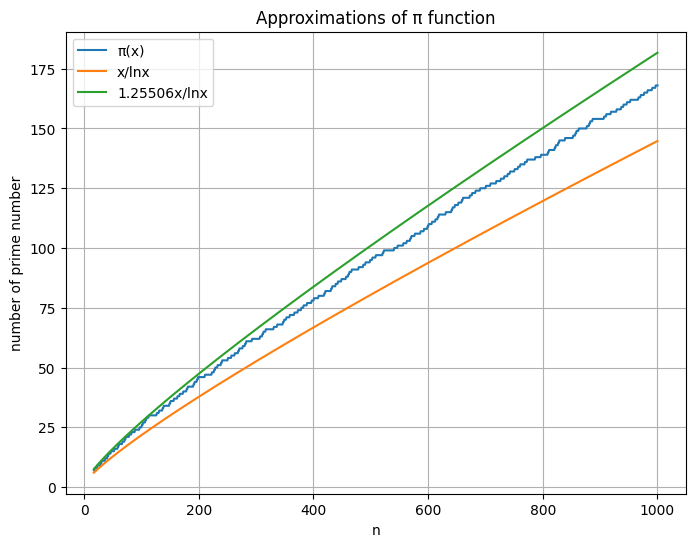

In [26]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

n = np.array([i for i in range(17,1001)])
vec_pi = np.vectorize(pi)
x1 = vec_pi(n)
x2 = n/np.log(n)
x3 = 1.25506 * n/np.log(n)
plt.figure(figsize=(8,6))
plt.plot(n,x1,label = "π(x)")
plt.plot(n,x2,label = "x/lnx")
plt.plot(n,x3,label = "1.25506x/lnx")
plt.xlabel("n")
plt.ylabel("number of prime number")
plt.title("Approximations of π function")
plt.grid()
plt.legend()
plt.show()



<br>

The offset logarithmic integral function, ${\rm Li}(x)$, is another function that can represent $\pi{(x)}$ for all sufficiently large values of $x$. ${\rm  Li}(x)$ is defined as the below.
$$\int_{2}^{x} {1 \over {\text{ln}(t)}} dt$$
You can numerically compute the definite integral by using the `scipy.integrate.quad()` function. For example, $\int_{0}^{1} {\text{ln}(x^2)} dx$ can be calculated by the following code.

In [27]:
from scipy.integrate import quad

fx = lambda x: np.log(x**2)
val,err=quad( fx, 0, 1 )
print(val)

-1.9999999999999998


<br>

_**(Problem 2)**_ Plot ${\rm Li}(x)$ for $x=17, 18, \dots, 999,1000$, and compare the result with the one you obtained from Problem 1.

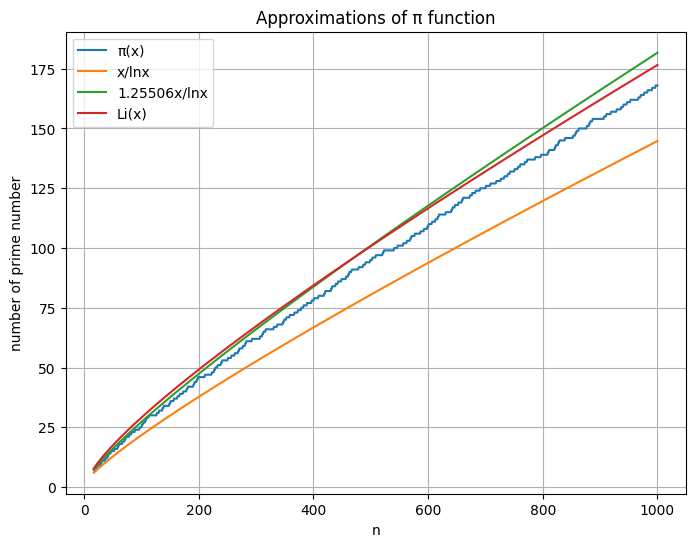

In [29]:
# your code here
# your code here
import numpy as np
import matplotlib.pyplot as plt


def Li(n):
  fx = lambda x: 1/np.log(x)
  val,err=quad( fx, 2,n )
  return val

Li_vec = np.vectorize(Li)


n = np.array([i for i in range(17,1001)])
x1 = vec_pi(n)
x2 = n/np.log(n)
x3 = 1.25506 * n/np.log(n)
x4 = Li_vec(n)




plt.figure(figsize=(8,6))
plt.plot(n,x1,label = "π(x)")
plt.plot(n,x2,label = "x/lnx")
plt.plot(n,x3,label = "1.25506x/lnx")
plt.plot(n,x4,label = "Li(x)")
plt.xlabel("n")
plt.ylabel("number of prime number")
plt.title("Approximations of π function")
plt.grid()
plt.legend()
plt.show()

<br>

A brilliant mathematician created an incredible formula to approximate $\pi{(x)}$ as below.

$$
R(x)=1+\sum_{k=1}^{\infty} {(\text{ln} (x))^k \over {k!k\,\zeta(k+1)}}
$$

This called the _Riemann's R-function_, and the $\zeta(s)$ is called the _Riemann zeta function_ which is defined as follows:

$$
\zeta (s)=\sum _{n=1}^{\infty }{\frac {1}{n^{s}}}
$$

You may make use the `scipy.special.zeta()` and `scipy.special.factorial()` from the `scipy` library, in order to compute the R-function. Here are some examples for using those function.

In [25]:
from scipy.special import factorial,zeta
print(factorial(3)) # print 3!
print(zeta(3)) #print zeta(3)

6.0
1.2020569031595942


<br>

_**(Problem 3)**_ You will not be able to calculate the above function with large $k$'s. So, we are going to limit $k$ to $K$ and will approximate the R-function with the following.

$$
R_K(x)=1+\sum_{k=1}^{K} {(\text{ln} (x))^k \over {k!k \zeta(k+1)}}
$$

Calculate $R_K$-function using scipy library and compare your results for $x=17, 18, \dots, 999,1000$ with the original $\pi{(x)}$. You are recommended to examine your approximations with different $K$'s, for example, $K=10,12,14$.

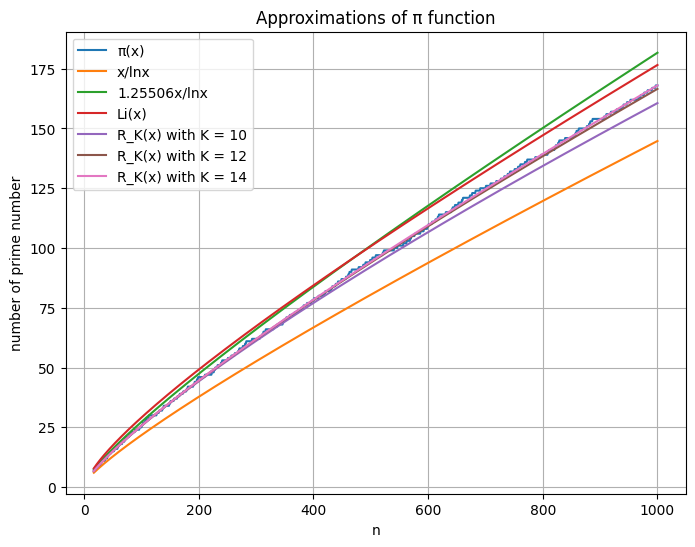

In [32]:
# your code here
def R_K(x,k):
  answer = 1
  for i in range(1,k+1):
    answer += (np.log(x))**(i) / (factorial(i)*i*zeta(i+1))
  return answer

# your code here
# your code here
import numpy as np
import matplotlib.pyplot as plt


def Li(n):
  fx = lambda x: 1/np.log(x)
  val,err=quad( fx, 2,n )
  return val

Li_vec = np.vectorize(Li)


n = np.array([i for i in range(17,1001)])
x1 = vec_pi(n)
x2 = n/np.log(n)
x3 = 1.25506 * n/np.log(n)
x4 = Li_vec(n)
x5 = np.array([R_K(i,10) for i in n])
x6 = np.array([R_K(i,12) for i in n])
x7 = np.array([R_K(i,14) for i in n])

plt.figure(figsize=(8,6))
plt.plot(n,x1,label = "π(x)")
plt.plot(n,x2,label = "x/lnx")
plt.plot(n,x3,label = "1.25506x/lnx")
plt.plot(n,x4,label = "Li(x)")
plt.plot(n,x5,label = "R_K(x) with K = 10")
plt.plot(n,x6,label = "R_K(x) with K = 12")
plt.plot(n,x7,label = "R_K(x) with K = 14")
plt.xlabel("n")
plt.ylabel("number of prime number")
plt.title("Approximations of π function")
plt.grid()
plt.legend()
plt.show()

<br>

_**(Problem 3)**_ Compare the approximation errors for the above approximations, on logarithmic scales. You may define the approximation error of the ${\rm Li}(x)$ function as follows.

$$
\epsilon_{{\rm Li}}(x) = | {\rm Li}(x) - \pi(x) |
$$

Briefly explain what you observed from these numerical experiments.

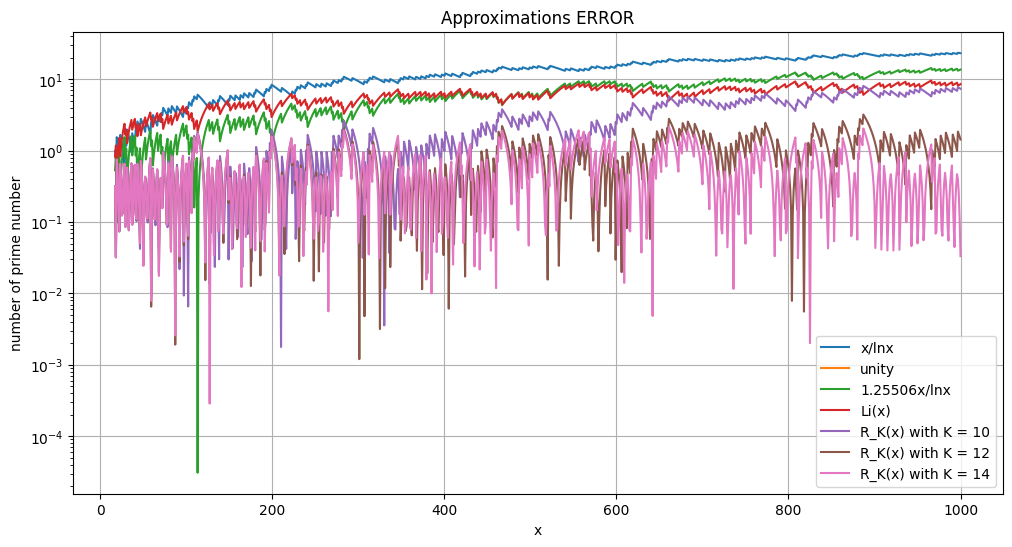

In [41]:
# your code here
n = np.array([i for i in range(17,1001)])
x1 = np.abs(vec_pi(n)-vec_pi(n))
x2 = np.abs(n/np.log(n)-vec_pi(n))
x3 = np.abs(1.25506 * n/np.log(n)-vec_pi(n))
x4 = np.abs(Li_vec(n)-vec_pi(n))
x5 = np.abs(np.array([R_K(i,10) for i in n])-vec_pi(n))
x6 = np.abs(np.array([R_K(i,12) for i in n])-vec_pi(n))
x7 = np.abs(np.array([R_K(i,14) for i in n])-vec_pi(n))






plt.figure(figsize=(12,6))

plt.plot(n,x2,label = "x/lnx")
plt.plot(n,x1,label = "unity")
plt.plot(n,x3,label = "1.25506x/lnx")
plt.plot(n,x4,label = "Li(x)")
plt.plot(n,x5,label = "R_K(x) with K = 10")
plt.plot(n,x6,label = "R_K(x) with K = 12")
plt.plot(n,x7,label = "R_K(x) with K = 14")
plt.xlabel("x")
plt.ylabel("number of prime number")
plt.yscale("log")
plt.title("Approximations ERROR")
plt.grid()
plt.legend()
plt.show()